# Projet Machine Learning

* RABHI Alexadre
* ZANIN Julien

GitHub : "https://github.com/Julien-Zanin/ML-DataChallenge.git"

**Insérer une table des matières**

## 1 - Sujet : [Challenge Collège de France : prédiction de rendement](https://challengedata.ens.fr/participants/challenges/84/)

### 1.1 - Contexte 

Prédiction du mouvement de la direction d'un rendement d'un actif sur la période de 14h-16h en partant des rendements de 9h à 14H, calculés à partir d'un pas de temps de 5 minutes. 

Chaques actif est propre à un dateset, les actifs du jeu d'entraînement sont différents des actifs du jeu de test. 

Chaque ligne est identifiable par un ID unique qui correspond à un couple jour - equity. 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.impute import SimpleImputer


In [3]:
path = r'input_training.csv'
X = pd.read_csv(path)
X.sort_values(by="ID",inplace=True)

In [4]:
data_test = pd.read_csv(r"input_test.csv")
data_test

,ID,day,equity,r0,r1,r2,r3,r4,r5,r6,...,r43,r44,r45,r46,r47,r48,r49,r50,r51,r52
0,1000000,1000384,1000064,79.19,-26.37,-167.18,103.46,-102.27,-198.02,13.77,...,-116.69,29.82,-29.69,77.57,23.75,82.94,-17.63,17.60,5.87,0.00
1,1000001,1000148,1000841,-321.77,-178.53,107.97,27.29,-64.54,-73.78,9.93,...,-12.21,1.53,32.08,-33.50,-21.41,43.89,68.07,-23.20,-13.14,-82.95
2,1000002,1000441,1000380,-51.95,-19.58,-26.16,-26.28,-3.29,3.29,-46.11,...,13.56,-10.16,-40.68,13.61,3.40,6.80,10.20,0.00,-10.19,-6.80
3,1000003,1000059,1001843,-169.49,9.57,-76.48,28.90,0.00,-19.21,105.87,...,-9.72,-9.72,-9.73,-9.74,29.24,-29.18,34.15,14.58,-29.13,4.87
4,1000004,1000336,1001783,-46.19,32.17,-3.08,-32.06,11.75,27.81,-13.55,...,-3.68,-1.84,-1.23,1.23,5.53,-7.37,1.84,1.23,0.61,-4.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885794,1885794,1000125,1001131,0.00,67.87,-67.41,-18.15,12.99,-42.80,29.96,...,-1.27,5.09,-12.73,5.10,-8.91,-20.41,2.56,0.00,-7.67,6.40
885795,1885795,1000314,1000333,76.29,-65.02,2.73,-24.54,-17.78,13.70,-19.17,...,1.36,-1.36,-13.65,0.00,0.00,-4.10,-2.73,10.94,10.93,8.18
885796,1885796,1000247,1000348,-73.66,37.11,-7.92,-7.93,0.00,-18.49,-26.46,...,-7.97,10.63,5.31,-10.61,0.00,13.28,-5.31,6.64,7.96,5.30
885797,1885797,1000035,1000040,0.00,-102.74,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,0.00,NaN,0.00,0.00,NaN,0.00,NaN,NaN


In [5]:
path = r'output\output_training_gmEd6Zt.csv'
y = pd.read_csv(path)
y


,ID,reod
0,0,0
1,1,0
2,2,-1
3,3,0
4,4,-1
...,...,...
843294,843294,1
843295,843295,-1
843296,843296,0
843297,843297,1


## On va analyser le nombre de NaN 

In [6]:
col_rendements = [col for col in X.columns if col.startswith("r")]

NaN_analysis = pd.DataFrame()
NaN_analysis["NaN_count"] = X[col_rendements].isna().sum(axis=1)

nombre_colonnes = len(col_rendements)
NaN_analysis["NaN_percent"] = (NaN_analysis["NaN_count"]/nombre_colonnes)*100

In [7]:
nbr_row_na = X.isna().any(axis=1).sum()
print(f"Nombre de ligne totale du dataset {len(X)}")
print(f"nombre de lignes contenant au moins des NaN {nbr_row_na}, soit en %: {(nbr_row_na/len(X)*100)}")
print(f"nombre de lignes avec plus 30% de NaN dans une colonne {len(NaN_analysis[NaN_analysis["NaN_percent"]>50])}, soit en % {len(NaN_analysis[NaN_analysis["NaN_percent"]>30])/len(X)*100}")



Nombre de ligne totale du dataset 843299
nombre de lignes contenant au moins des NaN 242363, soit en %: 28.739865694136956
nombre de lignes avec plus 30% de NaN dans une colonne 80786, soit en % 14.89898600614966


In [8]:
output_random_bench = pd.read_csv(r"output\output_test_random.csv")
input_test = pd.read_csv(r"input_test.csv")


In [9]:
print(f"nombre de lignes data input train {len(X)}")
print(f"Nombre de lignes output_training {len(y)}")
print(f"Nombre de lignes data input test {len(input_test)}")
print(f"Nombre de lignes de l'output random bench {len(output_random_bench)}")

nombre de lignes data input train 843299
Nombre de lignes output_training 843299
Nombre de lignes data input test 885799
Nombre de lignes de l'output random bench 885799


<Axes: >

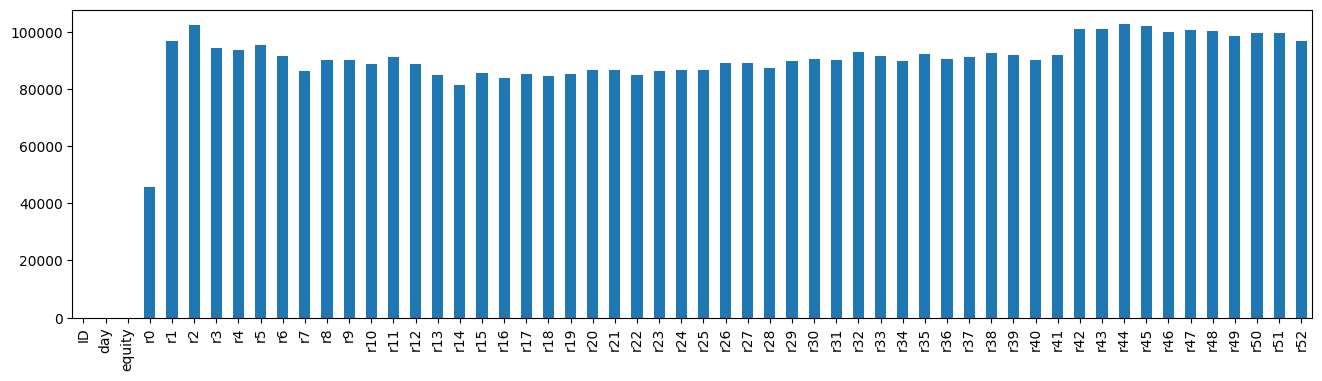

In [10]:
# insert your code here
plt.figure(figsize=(16,4))
(X.isna().sum()).plot.bar()

In [11]:
#On commence par fusionner les données de base sur la base de l'identifiant
df_train = pd.merge(X,y,on="ID")

In [12]:
df_train

,ID,day,equity,r0,r1,r2,r3,r4,r5,r6,...,r44,r45,r46,r47,r48,r49,r50,r51,r52,reod
0,0,249,1488,0.00,NaN,NaN,NaN,0.00,NaN,NaN,...,0.00,NaN,0.00,NaN,0.00,NaN,NaN,NaN,0.00,0
1,1,272,107,-9.76,0.00,-12.21,46.44,34.08,0.00,41.24,...,-16.92,-4.84,4.84,0.00,7.26,-9.68,-19.38,9.71,26.68,0
2,2,323,1063,49.85,0.00,0.00,-26.64,-23.66,-22.14,49.12,...,1.59,6.37,-49.32,-9.59,-6.40,22.41,-6.39,7.99,15.96,-1
3,3,302,513,0.00,NaN,0.00,0.00,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0
4,4,123,1465,-123.84,-115.18,-26.44,0.00,42.42,10.56,0.00,...,-21.44,-21.48,10.78,-21.55,-5.40,-10.81,5.41,-32.47,43.43,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843294,843294,297,123,3.96,0.00,-70.34,74.24,-0.56,0.00,-23.63,...,1.71,0.00,-3.98,2.28,-21.62,-1.71,9.12,0.00,9.11,1
843295,843295,16,1501,0.00,-183.49,-13.19,46.24,0.00,-39.60,13.25,...,6.62,0.00,19.85,0.00,-26.42,6.62,0.00,0.00,-19.88,-1
843296,843296,166,1231,37.02,2.93,-3.67,16.89,-4.03,13.56,-4.39,...,-3.28,-1.46,-3.65,-1.10,-13.51,2.92,-6.21,9.69,-3.66,0
843297,843297,297,747,34.45,15.10,-35.61,19.25,-16.46,-26.12,20.68,...,-5.52,-6.90,9.67,1.38,6.90,-11.04,33.16,13.77,12.38,1


## Feature Engineering 

Afin d'améliorer le modèle, on pourrait rajouter de nouvelles features : moyenne des rendements matinaux, volatilité...

On peut réflechir à l'encodage de certaines variables. Day pourrait être pertinent si les dates sont communes entre le data set de train et test en admettant qu'ils partent de la même base pour les jours. Nous n'avons pas de date précise. Par contre on peut essayer d'observer s'il y'a un mouvemenbt global haussier, baissier ou si par exemple certains jours, même si toutes les actions sont différentes, vont avoir le même mouvement après un mouvement prior.

In [13]:
print(X["equity"].value_counts())

equity
549     503
1309    503
871     503
1146    503
475     503
       ... 
57       15
1064     12
742      11
595       6
659       3
Name: count, Length: 1829, dtype: int64


In [14]:
print(X["equity"].value_counts())

equity
549     503
1309    503
871     503
1146    503
475     503
       ... 
57       15
1064     12
742      11
595       6
659       3
Name: count, Length: 1829, dtype: int64


## Premiers modèles 

## Stratégie simple (seulement sur les rendements)

In [16]:
# Remplace les NA d'une ligne par la moyenne de sa colonne --> Peut fortement biaiser, c'est un simple test

X_rendements = pd.DataFrame(X.loc[:,"r0":"r52"].fillna(0))
print(X_rendements["r0"].dtype)
print(X_rendements.isna().sum())
X_rendements

float64
r0     0
r1     0
r2     0
r3     0
r4     0
r5     0
r6     0
r7     0
r8     0
r9     0
r10    0
r11    0
r12    0
r13    0
r14    0
r15    0
r16    0
r17    0
r18    0
r19    0
r20    0
r21    0
r22    0
r23    0
r24    0
r25    0
r26    0
r27    0
r28    0
r29    0
r30    0
r31    0
r32    0
r33    0
r34    0
r35    0
r36    0
r37    0
r38    0
r39    0
r40    0
r41    0
r42    0
r43    0
r44    0
r45    0
r46    0
r47    0
r48    0
r49    0
r50    0
r51    0
r52    0
dtype: int64


,r0,r1,r2,r3,r4,r5,r6,r7,r8,r9,...,r43,r44,r45,r46,r47,r48,r49,r50,r51,r52
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-68.03,-34.25,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,-9.76,0.00,-12.21,46.44,34.08,0.00,41.24,12.08,-26.54,19.32,...,-4.83,-16.92,-4.84,4.84,0.00,7.26,-9.68,-19.38,9.71,26.68
2,49.85,0.00,0.00,-26.64,-23.66,-22.14,49.12,53.61,-4.70,-28.27,...,-6.37,1.59,6.37,-49.32,-9.59,-6.40,22.41,-6.39,7.99,15.96
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,-123.84,-115.18,-26.44,0.00,42.42,10.56,0.00,-47.57,21.28,-10.63,...,-5.36,-21.44,-21.48,10.78,-21.55,-5.40,-10.81,5.41,-32.47,43.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843294,3.96,0.00,-70.34,74.24,-0.56,0.00,-23.63,-9.57,-5.07,0.00,...,-10.80,1.71,0.00,-3.98,2.28,-21.62,-1.71,9.12,0.00,9.11
843295,0.00,-183.49,-13.19,46.24,0.00,-39.60,13.25,0.00,0.00,19.89,...,0.00,6.62,0.00,19.85,0.00,-26.42,6.62,0.00,0.00,-19.88
843296,37.02,2.93,-3.67,16.89,-4.03,13.56,-4.39,-14.28,-0.73,9.53,...,2.92,-3.28,-1.46,-3.65,-1.10,-13.51,2.92,-6.21,9.69,-3.66
843297,34.45,15.10,-35.61,19.25,-16.46,-26.12,20.68,-2.75,2.75,-11.01,...,-20.65,-5.52,-6.90,9.67,1.38,6.90,-11.04,33.16,13.77,12.38


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_val, y_train, y_val = train_test_split(X_rendements,y,test_size=0.1, random_state=42)

#On crée un pipeline :
pipeline_bench = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", RandomForestClassifier(n_estimators=50,max_depth=10,random_state=42, n_jobs=1)),
])


In [ ]:
pipeline_bench.fit(X_train,y_train)

y_pred = pipeline_bench.predict(X_val)

print("Accuracy", accuracy_score(y_val,y_pred))
print("Matrice de confusion : \n", confusion_matrix(y_val, y_pred))
print("Rapport de classification: \n", classification_report(y_val,y_pred))


MemoryError: could not allocate 12434948096 bytes